In [1]:
# Import libraries

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.color import rgb2hsv
from sklearn.model_selection import  train_test_split

In [2]:
import os
from matplotlib.image import imread
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report

In [3]:
# Path Mo
dir_path = "D:\\Studium\Master Budapest\\AIDS\\Traffic Signs Dataset"

In [ ]:
# Path Lorenz
dir_path = "Pfad hier einfügen"

In [17]:
train_path = dir_path + '\\Train'
test_path = dir_path + '\\OurTest'

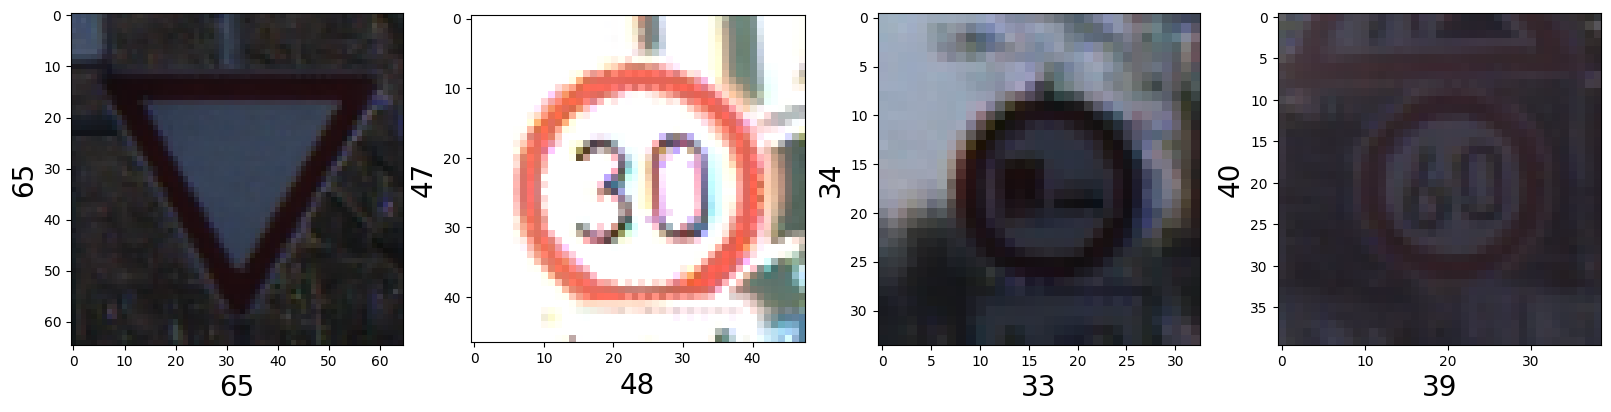

In [5]:
# Test if pictures can be shown

import random

images_path = os.listdir(test_path)

plt.figure(figsize=(25,25))


for i in range(1,5):
    
    plt.subplot(5,5,i)
    random_img_path = test_path +'/'+ random.choice(images_path)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [12]:
# Find the mean of all dimensions of all the images in training set

dim1 = []
dim2 = []

for i in range(0,47):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [13]:
# Define the shape of images: (50x50)

np.mean(dim1)
np.mean(dim2)

image_shape = (50, 50)

Preprocessing

In [10]:
# Categories

# 0 - 20kmh
# 1 - 30kmh
# 2 - 50kmh
# 3 - 60kmh
# 4 - 70kmh
# 5 - 80kmh
# 6 - 100kmh
# 7 - 120kmh
# 8 - Road closed
# 9 - No entry
# 10 - Red circled sign (other types of prohibitory traffic signs)
# 11 - Signs with diverse shapes (other types of prohibitory traffic signs)
# 12 - No right, left, or U-turn
# 13 - No stopping

So far missing signs in a further data set:

No left: 11
No right: 13
No U-turn: 15
No stopping: 54
No Parking: 

In [14]:
# Import images

from PIL import Image

images = []
label_id = []

category_mapping = {
    0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 7: 6, 8: 7, 15: 8, 17: 9, 9: 10, 10: 10, 16: 10,
    6: 11, 11: 11, 12: 11, 13: 11, 14: 11, 18: 11, 19: 11, 20: 11, 21: 11, 22: 11, 23: 11,
    24: 11, 25: 11, 26: 11, 27: 11, 28: 11, 29: 11, 30: 11, 31: 11, 32: 11, 33: 11, 34: 11,
    35: 11, 36: 11, 37: 11, 38: 11, 39: 11, 40: 11, 41: 11, 42: 11, 43: 12, 44: 12, 45: 12, 46: 13
}

for i in range(47):
    labels = train_path + '\\{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '\\' + x)
        img = img.resize(image_shape)
        img = np.array(img)
        images.append(img)
        updated_label = category_mapping.get(i, 11)
        label_id.append(updated_label)

In [15]:
# Normalize images between 0 and 1

images = np.array(images)
images = images/255

In [16]:
# Shapes

label_id = np.array(label_id)
print("Shape of labels: " + str(label_id.shape))

print("Shape of images: " + str(images.shape))

Shape of labels: (39729,)
Shape of images: (39729, 50, 50, 3)


In [11]:
np.save('Training_set', images)
np.save('Label_Id', label_id)

Split train data into train and validation data

In [5]:
# Load preprocessed data

images = np.load('Training_set.npy')
label_id = np.load('Label_Id.npy')

In [6]:
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [7]:
# One-hot encoding: Target labels to categorical (Using tensorflow keras function)

y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

Model building

In [8]:
# Create model

model = Sequential()

#1st layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#2nd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#3rd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

#Dense layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(43, activation = 'softmax'))

In [9]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
# Fit model

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

model.fit(
    
    x_train, y_train,
    epochs = 5,
    batch_size = 64,
    validation_data = (x_val, y_val),
    callbacks = [early_stopping],
    verbose = 2

)

Epoch 1/5
497/497 - 154s - loss: 1.3901 - accuracy: 0.6007 - val_loss: 0.7367 - val_accuracy: 0.7814 - 154s/epoch - 311ms/step
Epoch 2/5
497/497 - 124s - loss: 0.6158 - accuracy: 0.7871 - val_loss: 0.3237 - val_accuracy: 0.9232 - 124s/epoch - 249ms/step
Epoch 3/5
497/497 - 122s - loss: 0.3764 - accuracy: 0.8706 - val_loss: 0.1728 - val_accuracy: 0.9547 - 122s/epoch - 246ms/step
Epoch 4/5
497/497 - 121s - loss: 0.2664 - accuracy: 0.9119 - val_loss: 0.1148 - val_accuracy: 0.9780 - 121s/epoch - 243ms/step
Epoch 5/5
497/497 - 123s - loss: 0.2084 - accuracy: 0.9303 - val_loss: 0.0696 - val_accuracy: 0.9854 - 123s/epoch - 247ms/step


In [11]:
#Saving the model
model.save('Model.keras')

Model evaluation

<Axes: >

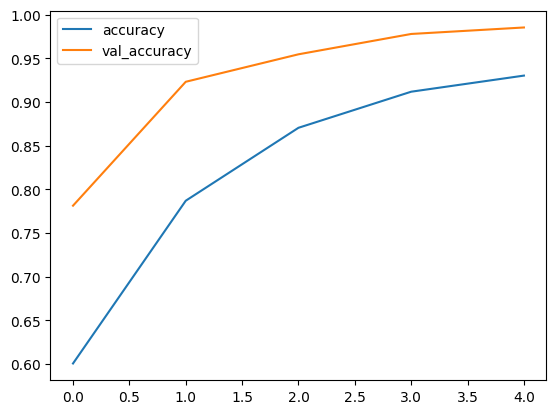

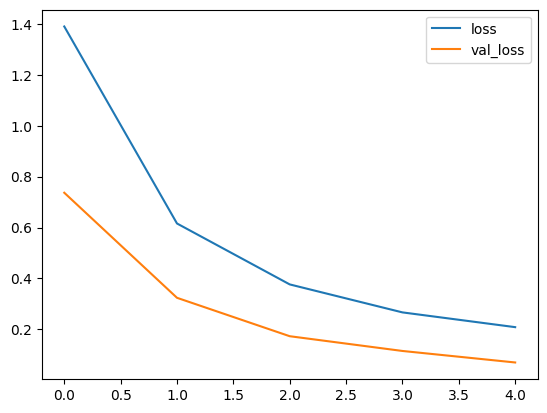

In [12]:
evaluation = pd.DataFrame(model.history.history)

evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

Testing

In [18]:
test_img = sorted(os.listdir(test_path))

In [19]:
# Scaling images

from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '\\' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    images = np.array(images)
    
    # Normalize images
    images = images/255

    return images

In [20]:
test_images = scaling(test_img,test_path)

In [27]:
# Change 'ClassId' in Test.csv to fit the categories found in "category_mapping" mentioned abouth

# Read Test.csv
test = pd.read_csv(dir_path + '\\Test.csv')

# Update ClassId according to category_mapping
test['ClassId'] = test['ClassId'].map(category_mapping).fillna(test['ClassId'])

# Save updated data back to the csv-file
test.to_csv(dir_path + '\\Test.csv', index=False)

In [28]:
# Test labels

y_test = test['ClassId'].values
y_test

array([10,  1, 11, ..., 11,  6, 10], dtype=int64)

In [21]:
# Predict test images
y_pred_prob = model.predict(test_images)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

y_pred

1/1 [==============================] - 2s 2s/step


array([12, 12, 12], dtype=int64)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        60
           1       0.94      0.96      0.95       720
           2       0.88      0.97      0.92       750
           3       0.99      0.85      0.91       450
           4       0.98      0.96      0.97       660
           5       0.83      0.88      0.86       630
           6       0.97      0.84      0.90       450
           7       0.85      0.90      0.88       450
           8       1.00      0.99      0.99       210
           9       1.00      0.87      0.93       360
          10       0.99      1.00      0.99      1290
          11       0.99      0.99      0.99      6600

    accuracy                           0.96     12630
   macro avg       0.95      0.91      0.92     12630
weighted avg       0.97      0.96      0.96     12630



In [23]:
# Display random pictures with predictions

category_descriptions = {
    0: "20kmh",
    1: "30kmh",
    2: "50kmh",
    3: "60kmh",
    4: "70kmh",
    5: "80kmh",
    6: "100kmh",
    7: "120kmh",
    8: "Road closed",
    9: "No entry",
    10: "Red circled sign",
    11: "Diverse shapes and others"
    12: "No right, left, or U-turn"
    13: "No stopping, no parking"
}

# How many random pics we wanna see
num_random_images = 2

# Chose random index
random_indices = random.sample(range(len(test_images)), num_random_images)

# Show random pics with predicted labels
plt.figure(figsize=(16, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_random_images, i + 1)
    plt.imshow(test_images[idx], cmap='gray')
    plt.title("y_pred: {}".format(category_descriptions[y_pred[idx]]), fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (637349969.py, line 13)

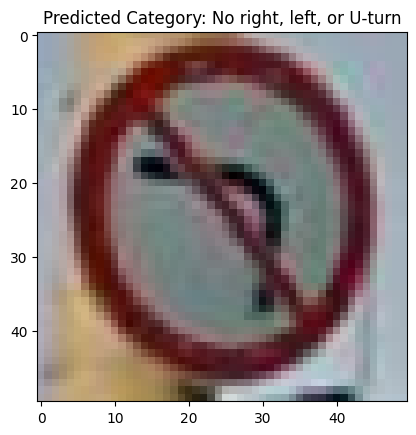

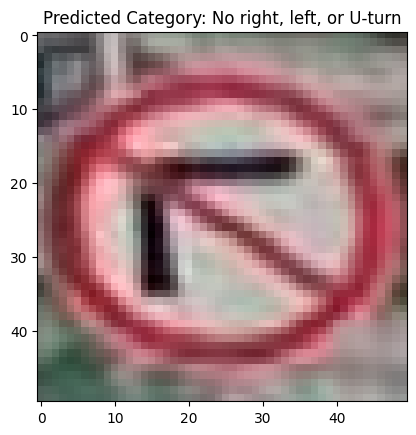

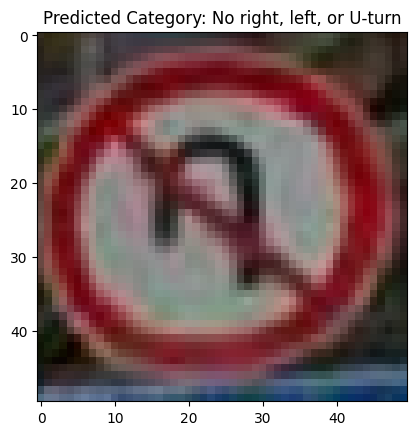

In [27]:
import matplotlib.pyplot as plt

category_descriptions = {
    0: "20kmh",
    1: "30kmh",
    2: "50kmh",
    3: "60kmh",
    4: "70kmh",
    5: "80kmh",
    6: "100kmh",
    7: "120kmh",
    8: "Road closed",
    9: "No entry",
    10: "Red circled sign",
    11: "Diverse shapes and others",
    12: "No right, left, or U-turn",
    13: "No stopping, no parking"
}

# Annahme: test_images ist ein Array von Bildern und y_pred ist ein Array von vorhergesagten Kategorien

for i in range(len(test_images)):
    plt.figure()
    plt.imshow(test_images[i], cmap='gray')  # Zeige das i-te Bild in Graustufen an
    predicted_category = y_pred[i]  # Vorhergesagte Kategorie
    category_description = category_descriptions.get(predicted_category, "Unknown")  # Beschreibung der Kategorie
    plt.title(f"Predicted Category: {category_description}")
    plt.show()


In [35]:
# Categories

# 0 - 20kmh
# 1 - 30kmh
# 2 - 50kmh
# 3 - 60kmh
# 4 - 70kmh
# 5 - 80kmh
# 6 - 100kmh
# 7 - 120kmh
# 8 - Road closed
# 9 - No entry
# 10 - Red circled sign (other types of prohibitory traffic signs)
# 11 - Signs with diverse shapes and others